# Black Friday Sale Dataset

In [1]:
# import kaggle

In [2]:
# !kaggle datasets download -d sdolezel/black-friday

In [3]:
# import zipfile
# with zipfile.ZipFile('black-friday.zip', 'r') as zip_ref:
#     zip_ref.extractall('datasets/black-friday/')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import os
os.listdir('datasets/black-friday/')

['test.csv', 'train.csv']

In [6]:
train_df = pd.read_csv('datasets/black-friday/train.csv')
test_df = pd.read_csv('datasets/black-friday/test.csv')
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
train_df.shape, test_df.shape

((550068, 12), (233599, 11))

In [8]:
len(test_df)/(len(train_df)+len(test_df))

0.298084518041464

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
train_df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
train_df.duplicated().sum()

0

This means that our dataset has 12 columns of which product_category 2 and 3 has null values. \
It has no duplicate rows
## Columns:
1. User_ID: The user who made the purchase
2. Product_ID: The product that was purchased
3. Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital Status: personal information about the user who bought the product
4. Product_Category_1 & 2 & 3: Categories to which the product belongs to
5. Purchase: The amount spent to purchase the purticular product

In [12]:
#label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['User_ID'] = le.fit_transform(train_df['User_ID'])
train_df['Product_ID'] = le.fit_transform(train_df['Product_ID'])
print("Product_ID", le.classes_)
train_df['Gender'] = le.fit_transform(train_df['Gender'])
print("Gender", le.classes_)
train_df['Age'] = le.fit_transform(train_df['Age'])
print("Age", le.classes_)
train_df['City_Category'] = le.fit_transform(train_df['City_Category'])
print("City_Category", le.classes_)

Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category ['A' 'B' 'C']


In [13]:
train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].replace('4+','4')
train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].astype('int')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int32  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 39.9 MB


### Products
Let us see what products were purchased the most

C:\Users\user\AppData\Local\Temp\ipykernel_4148\892981749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Purchase'])


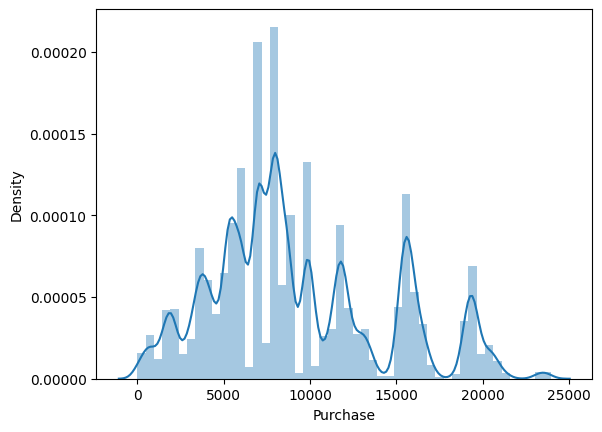

In [15]:
sns.distplot(train_df['Purchase'])
plt.show()

In [16]:
print(f"The average amount spent during black friday is equal to {train_df.Purchase.mean():.2f}")

The average amount spent during black friday is equal to 9263.97


In [17]:
# top 10 most sold products
train_df.groupby('Product_ID').size().sort_values(ascending=False).head(10)

Product_ID
2536    1880
249     1615
1016    1612
1030    1562
565     1470
1745    1440
458     1438
569     1422
1355    1406
582     1406
dtype: int64

The purchases are mostly for products that range between 5000 and 10000

In [18]:
train_df.Product_ID.unique().shape

(3631,)

There are 3631 unique products that were bought

In [19]:
arr = train_df.Product_Category_1.unique()
arr.sort()
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [20]:
train_df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
train_df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

This could mean that each number corresponds to a category and there are 20 categories in total, to confirm this let's

In [22]:
# Product P00265242 has 1880 purchases
train_df[train_df["Product_ID"]==2536][['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].nunique()

Product_Category_1      1
Product_Category_2      1
Product_Category_3      0
Purchase              862
dtype: int64

The above result concludes that each particular product can belong to atmost 3 categories that can range from 1 to 
20 and they stay consistent with the categories but not the price.

Now let's visualise what category of products were purchased the most

In [23]:
cat1_prods = train_df.groupby('Product_Category_1').size().reset_index()
cat1_prods.rename(columns={
    'Product_Category_1':'category',
    0:'num_prods'
}, inplace=True)

cat2_prods = train_df.groupby('Product_Category_2').size().reset_index()
cat2_prods.rename(columns={
    'Product_Category_2':'category',
    0:'num_prods'
}, inplace=True)

cat3_prods = train_df.groupby('Product_Category_3').size().reset_index()
cat3_prods.rename(columns={
    'Product_Category_3':'category',
    0:'num_prods'
}, inplace=True)
cat1_prods.shape, cat2_prods.shape, cat3_prods.shape,

((20, 2), (17, 2), (15, 2))

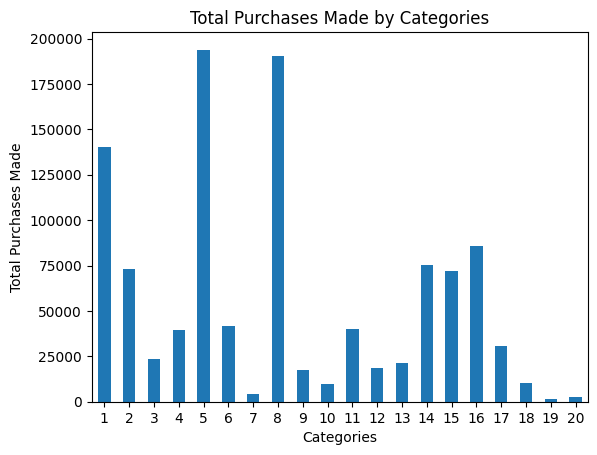

In [24]:
cat_prods = (cat1_prods.merge(cat2_prods,on='category',how='left')).merge(cat3_prods,on='category', how='left')
cat_prods = cat_prods.fillna(0)
cat_prods['num_prods'] = cat_prods['num_prods_x']+cat_prods['num_prods_y']+cat_prods['num_prods']
cat_prods.drop(columns=['num_prods_x','num_prods_y'], inplace=True)
ax = cat_prods.plot.bar(x='category', y='num_prods', legend=None)
plt.xlabel('Categories')  
plt.ylabel('Total Purchases Made')  
plt.title('Total Purchases Made by Categories')  
plt.xticks(rotation=0)
plt.show()

Amount spent vs category plot can also be made in a similar manner but then the fact that one product can belong to multiple categories can distort the graph in a manner where a product that was sold many times but belonged to a unique category would end up being insignificant

### User Specific EDA

In [25]:
print(f"{train_df.User_ID.nunique()} users made {len(train_df)} purchases during black friday")

5891 users made 550068 purchases during black friday


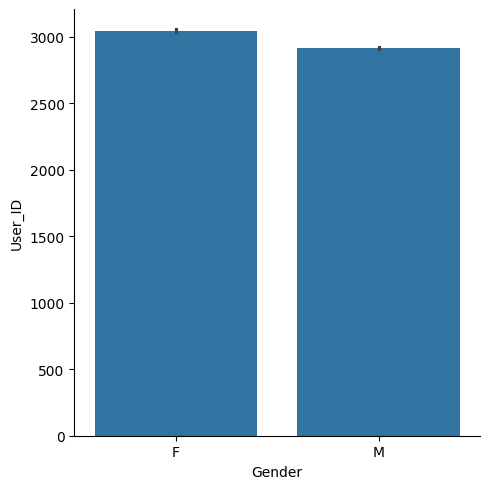

In [26]:
#Gender specific purchases
catplot = sns.catplot(data=train_df, x='Gender', y='User_ID', kind='bar')
labels = ['F', 'M']
catplot.set_xticklabels(labels)
plt.show()

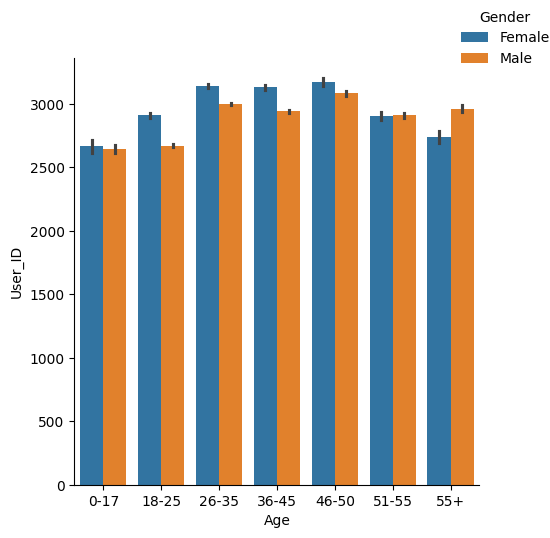

In [27]:
catplot = sns.catplot(data=train_df, x='Age', y='User_ID', hue='Gender', kind='bar')
gender_labels = ['Female', 'Male']  
for t, l in zip(catplot._legend.texts, gender_labels):
    t.set_text(l)
catplot._legend.set_bbox_to_anchor([1, 1])
labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
catplot.set_xticklabels(labels)
plt.show()

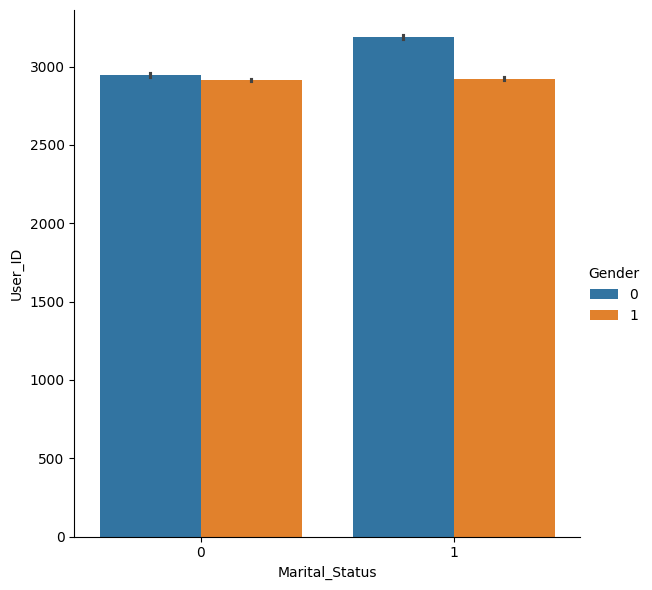

In [28]:
sns.catplot(data=train_df, x='Marital_Status', y='User_ID', hue='Gender', kind='bar', height=6)
gender_labels = ['Female', 'Male']  
for t, l in zip(catplot._legend.texts, gender_labels):
    t.set_text(l)
catplot._legend.set_bbox_to_anchor([1, 1])
plt.show()

When in comparison to gender and marital Status, the purchases made is only slightly different. 

In [29]:
print(f"There are {train_df['Occupation'].nunique()} different occupations as per dataset")

There are 21 different occupations as per dataset


Let us look into if employment status makes a difference in the Amount spent

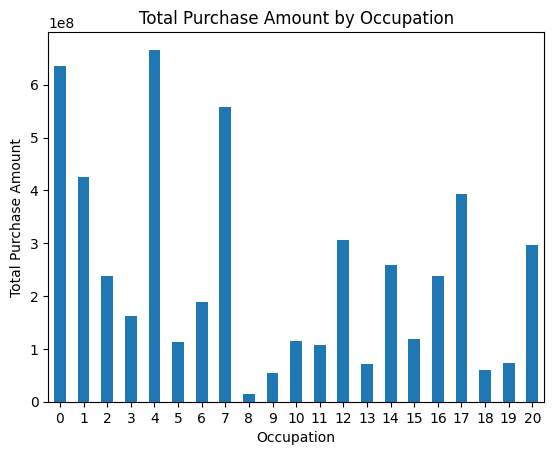

In [30]:
occ_train = train_df.groupby('Occupation').agg({
    'Purchase':['sum']
}).reset_index()
ax = occ_train.plot.bar(x='Occupation', y=('Purchase', 'sum'), legend=None)
plt.xlabel('Occupation')  
plt.ylabel('Total Purchase Amount')  
plt.title('Total Purchase Amount by Occupation')  
plt.xticks(rotation=0)
plt.show()

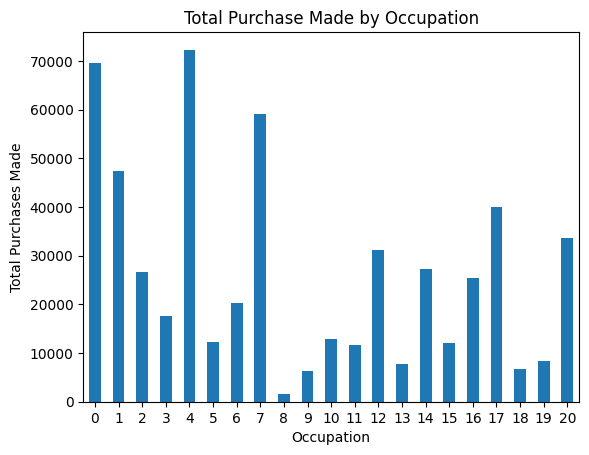

In [31]:
occ_train = train_df.groupby('Occupation').size().reset_index()
ax = occ_train.plot.bar(x='Occupation', y=0, legend=None)
plt.xlabel('Occupation')  
plt.ylabel('Total Purchases Made')  
plt.title('Total Purchase Made by Occupation')  
plt.xticks(rotation=0)
plt.show()

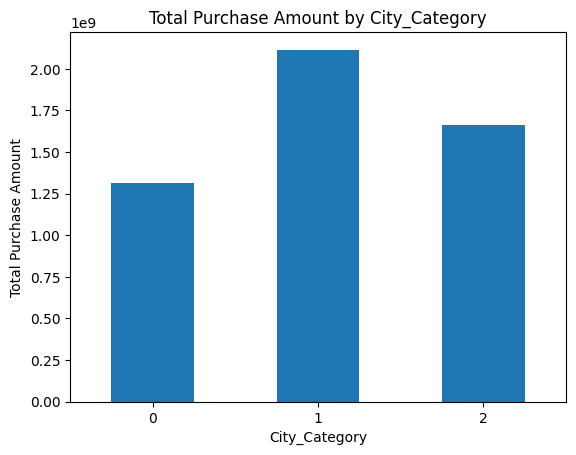

In [32]:
city_train = train_df.groupby('City_Category').agg({
    'Purchase':['sum']
}).reset_index()
ax = city_train.plot.bar(x='City_Category', y=('Purchase', 'sum'), legend=None)
plt.xlabel('City_Category')  
plt.ylabel('Total Purchase Amount')  
plt.title('Total Purchase Amount by City_Category')  
plt.xticks(rotation=0)
plt.show()

In [33]:
print(f"The Difference in amount between the city with the most purchases to the least is equal to {city_train.iloc[1,1]-city_train.iloc[0,1]:,}")
print(f"which is {city_train.iloc[1,1]/city_train.iloc[0,1]:.3f} times more.")

The Difference in amount between the city with the most purchases to the least is equal to 799,061,944
which is 1.607 times more.


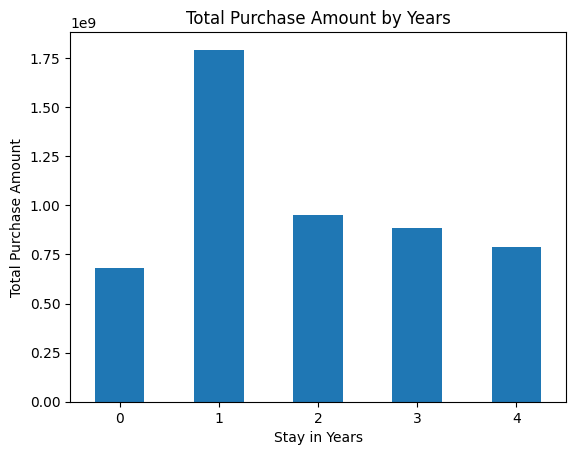

In [34]:
yrs_train = train_df.groupby('Stay_In_Current_City_Years').agg({
    'Purchase':['sum']
}).reset_index()
ax = yrs_train.plot.bar(x='Stay_In_Current_City_Years', y=('Purchase', 'sum'), legend=None)
plt.xlabel('Stay in Years')  
plt.ylabel('Total Purchase Amount')  
plt.title('Total Purchase Amount by Years')  
plt.xticks(rotation=0)
plt.show()

From the above plots we can conclude that:
1. Occupation largely influences the purchases made during black friday.
2. Where the user lives is also an important factor.
3. The purchases made peaks in the 1st year of their stay and then comes to a stagnant position.

## Let's dive deep into the correlations

In [35]:
#checking the correlation of the features
corr_spearman = train_df.corr()
corr_pearson = train_df.corr(method='pearson')
corr_kendall = train_df.corr(method='kendall')

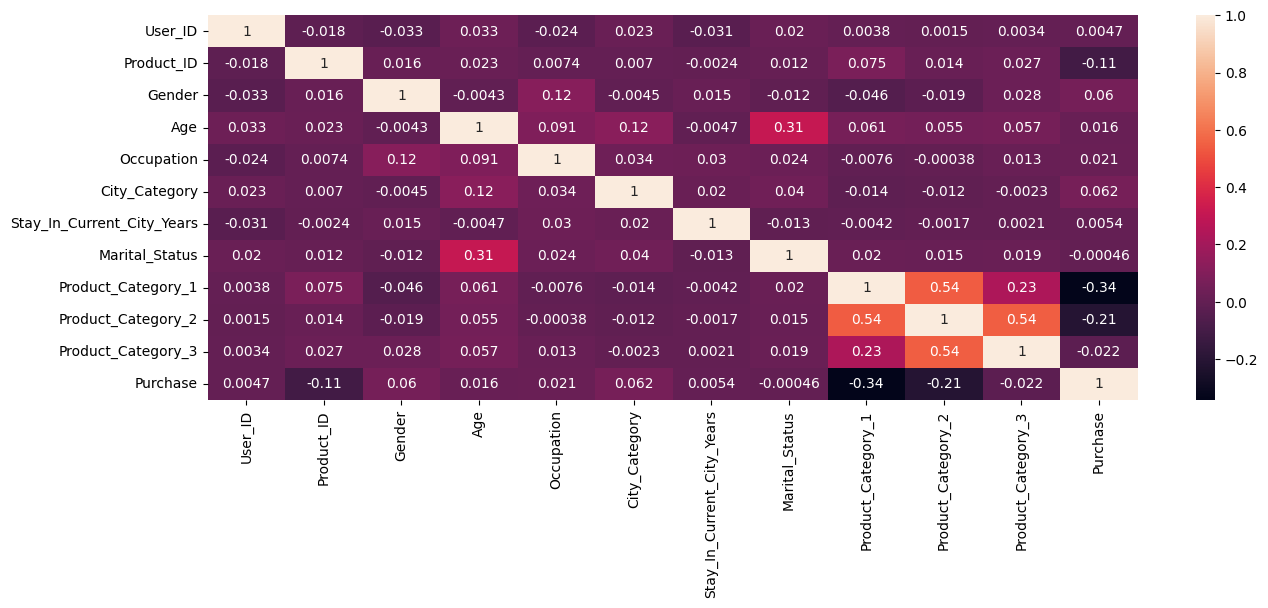

In [36]:
#spearman correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_spearman, annot=True)
plt.show()

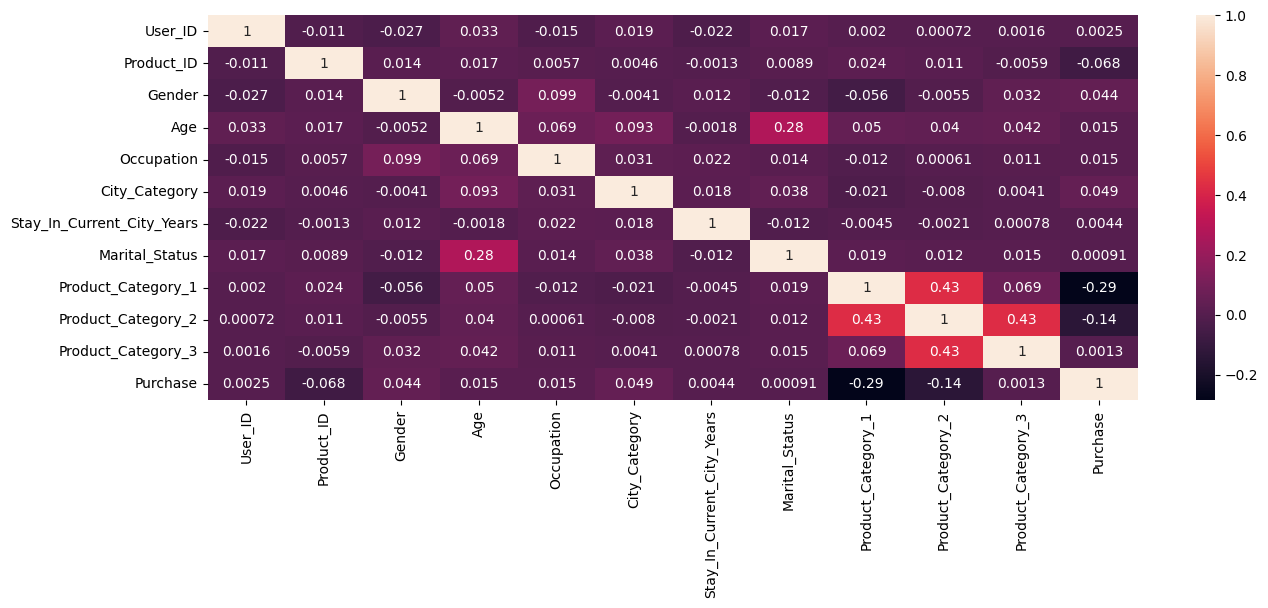

In [37]:
#kendall correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_kendall, annot=True)
plt.show()

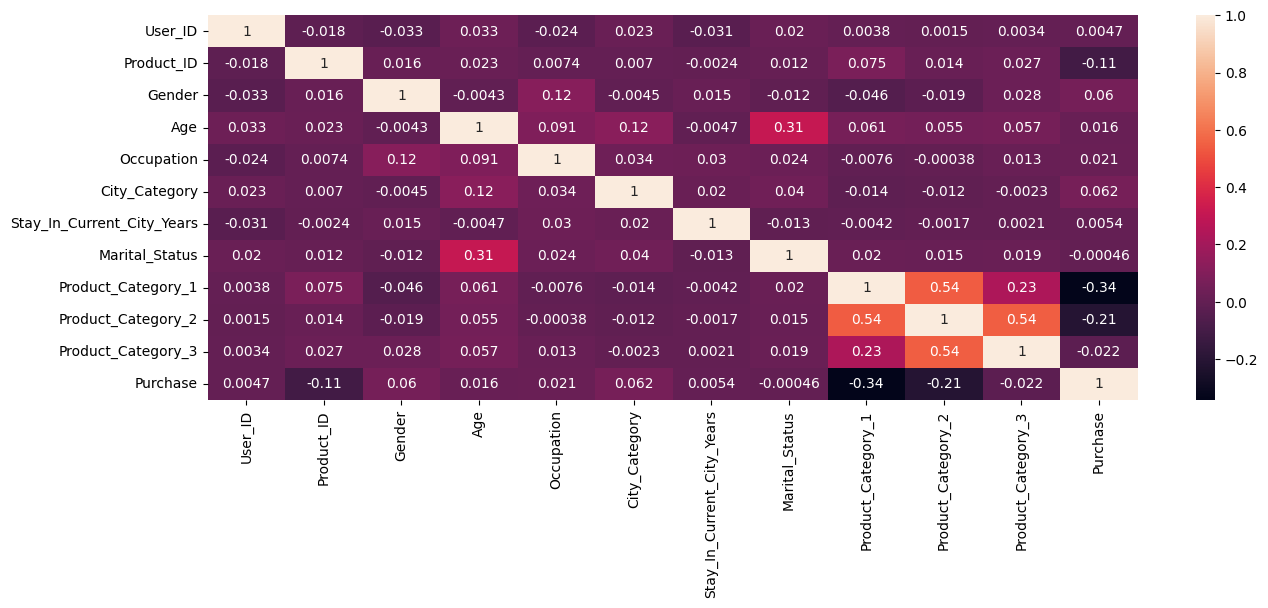

In [38]:
#pearson correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_pearson, annot=True)
plt.show()

In [39]:
corr_spearman_purchase = corr_spearman["Purchase"]

In [40]:
corr_spearman_purchase[(corr_spearman_purchase<-0.1)|(corr_spearman_purchase>0.1)]

Product_ID           -0.109345
Product_Category_1   -0.343703
Product_Category_2   -0.209918
Purchase              1.000000
Name: Purchase, dtype: float64

In [41]:
corr_pearson_purchase = corr_pearson["Purchase"]
corr_pearson_purchase[(corr_pearson_purchase<-0.1)|(corr_pearson_purchase>0.1)]

Product_ID           -0.109345
Product_Category_1   -0.343703
Product_Category_2   -0.209918
Purchase              1.000000
Name: Purchase, dtype: float64

In [42]:
corr_kendall_purchase = corr_kendall["Purchase"]
corr_kendall_purchase[(corr_kendall_purchase<-0.1)|(corr_kendall_purchase>0.1)]

Product_Category_1   -0.285766
Product_Category_2   -0.137343
Purchase              1.000000
Name: Purchase, dtype: float64

From the above it becomes very clear that the price of the product is only influenced by it's category

## Statistical Analysis

### It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

$H_0$ : mean of purchase made by men of age 18-25 is 1000 \
$H_1$ : Mean is not equal to 1000

In [47]:
data_1 = train_df[(train_df['Age']==1)&(train_df['Gender']==1)].sample(1000, random_state=0)
data_1.shape

(1000, 12)

In [48]:
data_1.Purchase.mean()

9534.822

From the sample we've taken we see that the mean is 9426.32 which is less that 10000. But let's perform a t-test to gather evidence for the alternate hypothesis

In [66]:
from scipy.stats import ttest_1samp # Calculate the T-test for the mean of ONE group of scores.

t_stat, p_value = ttest_1samp(data_1.Purchase, 9426.32)
print(f"The t statistic comes around {t_stat:.4f} and the p-value is {p_value:.4f}")

The t statistic comes around -3.6986 and the p-value is 0.0002


Since the p-value is greater than 0.025, we cannot conclude that there is enough evidence to reject the null hupothesis. Thus, the mean purchase for men aged 18-25 is 10,000

### It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?


$H_0:$ p = 0.35 # proportion of female buyers who spent more than 10,000 \
$H_1:$ p $\not=$ 0.35

In [56]:
data_2 = train_df[train_df['Purchase']>10000].sample(1000, random_state=0)
data_2.shape

(1000, 12)

In [59]:
# from the sample that we have collected, let's calculate the proportion, female_buyers/total_buyers
data_2.Gender.value_counts()[0]/(data_2.Gender.value_counts()[0]+data_2.Gender.value_counts()[1])

0.214

We get a value that is lower than 0.35, so let's conduct a z test to verify

In [62]:
from statsmodels.stats.proportion import proportions_ztest # Test for proportions based on normal (z) test
z_test, p_value = proportions_ztest(  count=data_2.Gender.value_counts()[0], # count of females who purchased > 10000
                                      nobs=len(data_2.Gender), # total obs
                                      value=0.35, # hypothesised value
                                      alternative='two-sided',
                                      prop_var=False
                                     )

print(f"The z statistic comes around {z_test:.4f} and the p-value is {p_value:.4f}")

The z statistic comes around -10.4863 and the p-value is 0.0000


Since the p-value is very low and the z statistic is way off, we can reject the null hypothesis in favour of the alternate hypothesis as we have enough evidence.

### Is the average purchase made by men and women of the age 18-25 same?

$H_0:$ The mean of purchases made by men and women of age 18-25 are the same \
$H_1:$ The mean is not the same

In [63]:
data_3_men = train_df[(train_df['Gender']==1)&(train_df['Age']==1)].sample(1000, random_state=0)
data_3_women = train_df[(train_df['Gender']==0)&(train_df['Age']==1)].sample(1000, random_state=0)
data_3_men.shape, data_3_women.shape

((1000, 12), (1000, 12))

In [64]:
print(f"Average purchase by men, according to sample = {data_3_men.Purchase.mean()}")
print(f"Average purchase by women, according to sample = {data_3_women.Purchase.mean()}")

Average purchase by men, according to sample = 9534.822
Average purchase by women, according to sample = 8515.094


According to our sample they are nearly same, but off by 1000

In [69]:
from scipy.stats import ttest_ind # Calculate the T-test for the means of two independent samples of scores.

t_stat_2samp, p_val_2samp = ttest_ind(data_3_men.Purchase, 
                                      data_3_women.Purchase, 
                                      axis=0, 
                                      equal_var=False, 
                                      alternative='two-sided'
                                      )
print(f"The t statistic is {t_stat_2samp:.8f} and the p-value is {p_val_2samp:.8f}")

The t statistic is 4.59544676 and the p-value is 0.00000459


Since our p-value is way lower than 0.025, we can conclude that we have enough evidence to reject $H_0$ in favour of $H_1$
Thus concluding that the average is not the same

### Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

In [83]:
data_4_18_25 = train_df[(train_df['Purchase']>10000)&(train_df['Age']==1)].sample(1000, random_state=0)
data_4_26_35 = train_df[(train_df['Purchase']>10000)&(train_df['Age']==2)].sample(1000, random_state=0)
data_4_18_25.shape, data_4_26_35.shape

((1000, 12), (1000, 12))

In [84]:
data_4_18_25_men = (data_4_18_25.Gender==1).sum()
data_4_18_25_prop = data_4_18_25_men/len(data_4_18_25)
print(f"Proportion of men in age group 18-25 who spend more than 10000 is {data_4_18_25_prop}")

Proportion of men in age group 18-25 who spend more than 10000 is 0.81


In [85]:
data_4_26_35_men = (data_4_26_35.Gender==1).sum()
data_4_26_35_prop = data_4_26_35_men/len(data_4_26_35)
print(f"Proportion of men in age group 26-35 who spend more than 10000 is {data_4_26_35_prop}")

Proportion of men in age group 26-35 who spend more than 10000 is 0.801


Both the proportions are nearly the same for the two samples but let's conduct ztest to verify for the population

In [86]:
from statsmodels.stats.proportion import proportions_ztest
count = [data_4_18_25_men, data_4_26_35_men]
nobs = [len(data_4_18_25), len(data_4_26_35)]
z_stat_2sample, p_value_2sample = proportions_ztest(count=count, 
                                                  nobs=nobs, 
                                                  value=0, 
                                                  alternative='two-sided',
                                                  prop_var=False)
print(f"The z statistic comes around {z_stat_2sample:.4f} and the p-value is {p_value_2sample:.4f}")

The z statistic comes around 0.5084 and the p-value is 0.6111


Since the p-value is greater than 0.025, we cannot reject the null hypothesis. Thus, we conclude that the proportion of men who spend more than 10,000 in both the categories is the same